# Семинар по библиотеке Pandas

Библиотека Pandas - важная библиотека, с которой мы будем активно работать в курсе. Pandas $-$ это модуль для первичной работы с данными, с помощью которого можно проводить простой анализ данных и предобработку данных..
Основные возможности:
* удобное чтение и запись данных из csv, txt, xls, SQL databases, HDF5
* удобная работа с пропусками в данных
* поиск, сортировка, выборка объектов, удовлетворяющих заданным критериям
* возможности по соединению датасетов
* красивая визуализация

Импорт библиотеки:

In [1]:
import pandas as pd

### Загрузка данных и создание датафреймов

__Наиболее популярные форматы данных (при скачивании датасета из интернета)__:
* _csv_ (comma separated file), _tsv_ (tab separated file) - таблицы, записанные в текстовые файлы с простой структурой. Эти файлы можно открывать в обычном текстовом редакторе. Pandas позволяет считывать эти данные именно в формате таблицы.
* _xls_ (eXceL Spreadsheet $-$ таблицы Microsoft)
* _json_ (JavaScript Object Notation, используется для _сериализации_ структур языка, то есть сохранения сложных объектов, например, вложенных списков или словарей python). Json-текст представляет собой либо набор пар ключ: значение, либо упорядоченный набор значений
* _txt_ в иной специфичной для задачи форме (например, vowpal-wabbit и uci bag-of-words для <<мешка слов>>)

В pandas есть функции для считывания во всех этих форматах.

В реальной жизни данные хранятся в базах данных, откуда с помощью sql-подобных языков из них составляют файлы в указанных выше форматах.

__Чтение из csv с помощью pandas__:
[pandas.read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
У функции несколько параметров, основные необходимые:
* filepath_or_buffer (перый и единственный обязательный аргумент) --- имя файла
* sep $-$ разделитель (; , \t ...)
* quotechar $-$ символ кавычек, все что внутри считается за строку (разделители также могут входить в эту строку; ' " ...)
* names $-$ список названий колонок
* header $-$ номер строки файла (с 0), которую нужно считать заголовком
* dtype $-$ словарь, сопоставляющий именам колонок типы данных в них
* na_values $-$ строка/список/словарь (ключи $-$ названия колонок) строковых значений, которые нужно считать пропуском.

По умолчанию names=None и header=0, то есть названия колонок берутся из первой строки файла. Можно передать названия через names. Если вы не хотите давать названия, укажите header=None, тогда названия будут даны автоматически индексами с 0. Учтите, что названия нужны при дальнейшей работе с данными (если вы только не собираетесь взять оттуда только numpy-матрицу; в этом случае они не понадобятся). Следите за длиной списка названий, он должен совпадать с реальным числом колонок в файле (а в противном случае вы получите ошибки)! Чтобы заменить заголовки, записанные в файле, нужно установить header=0 и передать names.

В функцию pd.read\_csv можно передавать как путь к файлу, хранящемуся на компьютере, так и ссылку на файл в Интернете.

Для чтения xls: [pandas.read_excel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)

Для чтения sql: [pandas.read_sql](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)


Считывание данных:

In [ ]:
# Локальный файл
d1 = pd.read_excel('my_file.xlsx')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


Мы будем работать с данными Titanic: он содержит информаицию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy; Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson; Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson; Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser; Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


Посмотреть первые строки:

In [6]:
data.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,Dooley; Mr. Patrick,male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data

Переменная, которую возвращает функция чтения, ссылается на _датафрейм_; это основная структура данных в pandas. Его можно создать и вручную:

In [8]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


### Работа со строками и столбцами датафрейма

Датафрейм - это таблица. Названия строк:

In [9]:
data.index

RangeIndex(start=0, stop=891, step=1)

Названия столбов:

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Полезный функционал:
* параметр df.dtypes $-$ типы колонок
* метод [df.fillna(value)](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html), value $-$ на что заменить (скаляр или словарь с ключами-названиями колонок)
* методы df.head([N]) и df.tail([N]) $-$ показать N (необязательный аргумент) первых или последних значений
* параметры df.index, df.columns и df.values $-$ соответственно индексы строк датафрейма, названия колонок и np.array, составленный из значений датафрейма
* метод df.T $-$ транспонировать данные (поменять строки и столбцы местами)
* сортировка данных по индексу (по названиям строк) и по значениям колонки, например df.sort_index(axis=1, ascending=False) и df.sort_values(by='B')
* метод df.copy() $-$ копировать датафрейм

Все структуры данных, показываемые и возвращаемые pandas, имеют тип, придуманный разработчиками pandas (а не стандартный для python список или словарь). Все эти типы имеют удобный интерфейс обращения к своим элементам (индексация, slicing), но иногда кажутся непривычными. Например, df[smth], как указано выше, должен выдать колонку, имеющую название smth (если она существует в датафрейме).

В датафрейме могут храниться данные разных типов (главное, чтобы тип был один и тот же внутри колонки), например float, int, string.

In [11]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
type(data['Age'])

pandas.core.series.Series

In [14]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Выбор нескольких столбцов:

In [15]:
data[["Age", "Sex", "Cabin"]]

,Age,Sex,Cabin
0,22.0,male,NaN
1,38.0,female,C85
2,26.0,female,NaN
3,35.0,female,C123
4,35.0,male,NaN
...,...,...,...
886,27.0,male,NaN
887,19.0,female,B42
888,NaN,female,NaN
889,26.0,male,C148


In [16]:
print(data.index[2:5])
print(data.columns[0])
print(data.dtypes)

RangeIndex(start=2, stop=5, step=1)
PassengerId
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


В машинном обучении библиотеку удобно использовать со следующей интерпретацией: по строкам датафрейма находятся объекты, по столбцам - признаки и целевая переменная. В нашем датафрейме целевая переменная задана в столбце Survived. Если мы бы хотели выделить часть датафрейма без этого столбца, мы бы использовали такой код:

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


In [19]:
target = data.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
data.drop("Survived", axis = 1).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Обратите внимание, что столбец не удалился из датафрейма навсегда. Наоборот, результат нашей операции записан в выводе, и если бы мы хотели его сохранить, мы должны были бы присвоить результат операции новой переменной.

Индексация по строкам:

In [26]:
data[:5, :3]

TypeError: '(slice(None, 5, None), slice(None, 3, None))' is an invalid key

In [25]:
data.iloc[:5, :3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [27]:
data.loc[:5, ['PassengerId', 'Survived']]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0


In [28]:
data.index % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,

In [30]:
data2 = data.iloc[data.index % 2 == 0]

data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,McCarthy; Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,Johnson; Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,Dahlberg; Miss. Gerda Ulrika,female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,Sutehall; Mr. Henry Jr,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [31]:
data2.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
3,6,7,0,1,McCarthy; Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
4,8,9,1,3,Johnson; Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,882,883,0,3,Dahlberg; Miss. Gerda Ulrika,female,22.0,0,0,7552,10.5167,NaN,S
442,884,885,0,3,Sutehall; Mr. Henry Jr,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
443,886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
444,888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Использовать столбец Name для задания названий строк (index):

In [40]:
data.set_index(data['Name'], inplace = True)

In [41]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
Braund; Mr. Owen Harris,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
Cumings; Mrs. John Bradley (Florence Briggs Thayer),2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
Heikkinen; Miss. Laina,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
Futrelle; Mrs. Jacques Heath (Lily May Peel),4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
Allen; Mr. William Henry,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
Montvila; Rev. Juozas,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
Graham; Miss. Margaret Edith,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
"Johnston; Miss. Catherine Helen ""Carrie""",889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [37]:
data3 = data.set_index(data["Name"])
data3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
Braund; Mr. Owen Harris,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
Cumings; Mrs. John Bradley (Florence Briggs Thayer),2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
Heikkinen; Miss. Laina,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
Futrelle; Mrs. Jacques Heath (Lily May Peel),4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
Allen; Mr. William Henry,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
Montvila; Rev. Juozas,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
Graham; Miss. Margaret Edith,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
"Johnston; Miss. Catherine Helen ""Carrie""",889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [38]:
data3.loc['Braund; Mr. Owen Harris', 'PassengerId']

1

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
Braund; Mr. Owen Harris,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
Cumings; Mrs. John Bradley (Florence Briggs Thayer),2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
Heikkinen; Miss. Laina,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
Futrelle; Mrs. Jacques Heath (Lily May Peel),4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
Allen; Mr. William Henry,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Теперь строки индексируются с помощью Name (выделено жирным в начале каждой строки).

Считывание данных без названий колонок и придумывание своих названий колонкам:

In [42]:
data_m = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",
                     header=None)

In [43]:
data_m

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [44]:
data_m.columns = ["col"+str(i) for i in range(23)]

In [45]:
data_m.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Анализ и преобразование датафрейма

Основная информация по датафрейму:

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

In [48]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


По этим статистикам можно понять, одинаковый ли масштаб имеют признаки (например, Age измеряется от 0 до 80, а Pclass в единицах - от 1 до 3). Также можно понять, есть ли пропуски в данных (по count). Например, в графе Age есть пропуски.

Уникальные значения в столбце:

In [49]:
set(data["Sex"])

{'female', 'male', 'unknown'}

In [50]:
data['Sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

Уникальные значения в столбце с числом строк с таким значением:

In [51]:
data["Sex"].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Перекодирование столбца с помощью функции map:

In [52]:
sex = data["Sex"]
sex.map({"male":1, "female":-1, "unknown":0}).head()

0    1
1   -1
2   -1
3   -1
4    1
Name: Sex, dtype: int64

Функция apply: применение функции поэлементно к столбцу или строке (+ создание нового столбца, потому что apply возвращает результат и никак не модифицирует датафрейм)

In [53]:
data["NewAge"] = data["Age"].apply(lambda x: x+100)

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,138.0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,135.0
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,135.0


Функция groupby: создание групп по значению какого-то столбца (или группы столбцов)

In [29]:
data.groupby("Sex")

In [30]:
data.groupby("Sex")['Age'].apply(lambda x: x.mean())

Sex
female     27.953846
male       30.774590
unknown    19.276667
Name: Age, dtype: float64

Создаем столбец с фамилией:

In [56]:
data["Family"] = data["Name"].apply(lambda s: s.split(";")[0])

In [33]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,Family
Name,,,,,,,,,,,,,,
Braund; Mr. Owen Harris,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.25,NaN,S,122.0,Braund


In [57]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,Family
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0,Braund
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,138.0,Cumings
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0,Heikkinen
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,135.0,Futrelle
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,135.0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,127.0,Montvila
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,119.0,Graham
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Johnston
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,126.0,Behr


Сколько человек в каждой семье (семья - множество людей с одной фамилией Family)?

In [58]:
data.groupby("Family")

In [59]:
data.groupby("Family")["Age"].count()

Family
Abbing           1
Abbott           2
Abelson          2
Adahl            1
Adams            1
                ..
de Mulder        1
de Pelsmaeker    1
del Carlo        1
van Billiard     1
van Melkebeke    0
Name: Age, Length: 667, dtype: int64

In [60]:
data.groupby("Family")["Age"].mean()

Family
Abbing           42.0
Abbott           25.5
Abelson          29.0
Adahl            30.0
Adams            26.0
                 ... 
de Mulder        30.0
de Pelsmaeker    16.0
del Carlo        29.0
van Billiard     40.5
van Melkebeke     NaN
Name: Age, Length: 667, dtype: float64

In [61]:
grouped_family = data.groupby("Family")["Age"]

In [62]:
grouped_family.mean()

Family
Abbing           42.0
Abbott           25.5
Abelson          29.0
Adahl            30.0
Adams            26.0
                 ... 
de Mulder        30.0
de Pelsmaeker    16.0
del Carlo        29.0
van Billiard     40.5
van Melkebeke     NaN
Name: Age, Length: 667, dtype: float64

Сколько семей, в которых больше трех человек?

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,Family
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0,Braund
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,138.0,Cumings
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0,Heikkinen
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,135.0,Futrelle
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,135.0,Allen


In [74]:
(data.groupby("Family")['SibSp'].count() > 3).sum()

22

In [73]:
(data.groupby("Family")['Fare'].count() > 3).sum()

22

In [64]:
(data.groupby("Family")["Fare"].count() > 3).sum()

22

Выбор строк по условию (индексация по строкам по массиву из True и False)

In [75]:
data[(data.Age > 10) & (data.Sex=="male")].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,Family
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0,Braund
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,135.0,Allen
6,7,0,1,McCarthy; Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S,154.0,McCarthy
12,13,0,3,Saundercock; Mr. William Henry,male,20.0,0,0,A/5. 2151,8.0500,NaN,S,120.0,Saundercock
20,21,0,2,Fynney; Mr. Joseph J,male,35.0,0,0,239865,26.0000,NaN,S,135.0,Fynney


### Задания:

1. Какова доля семей, в которых минимальный возраст меньше 20 (семьи с детьми)?

In [55]:
# your code here
(data.groupby("Family")["Age"].min() < 20).sum() / len(data.Family.unique())

0.18590704647676162

2. Какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?

In [57]:
# your code here
data.groupby("Pclass")['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
# your code here

3. Сколько пассажиров выжило, а сколько - нет?

In [59]:
#your code here
data.Survived.sum() / len(data)

0.3838383838383838

4. Создайте столбец "IsChild", который равен 1, если возраст меньше 20, и 0 иначе. Для пропущенных значений поведение функции может быть произвольным.

In [60]:
# your code here
data['IsChild'] = data.Age < 20

5. Какова доля выживших женщин из первого класса? А доля выживших мужчин из 3 класса?

In [64]:
# your code here
data.groupby(by=['Sex', 'Pclass'])['Survived'].mean()

Sex      Pclass
female   1         0.968085
         2         0.921053
         3         0.500000
male     1         0.368852
         2         0.149533
         3         0.136232
unknown  2         1.000000
         3         0.250000
Name: Survived, dtype: float64

# Matplotlib

In [78]:
import matplotlib.pyplot as plt
import numpy as np

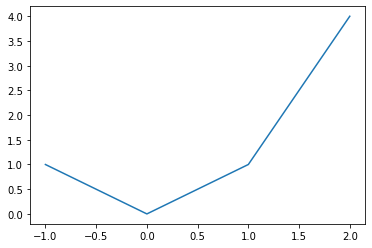

In [79]:
x = np.array([-1, 0, 1, 2])
plt.plot(x, x ** 2)

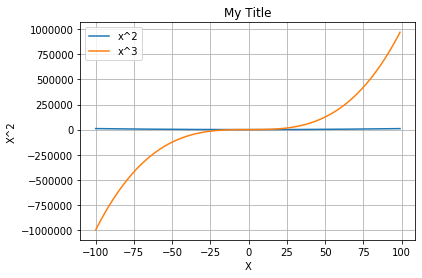

In [85]:
x = np.arange(-100, 100)
plt.plot(x, x ** 2, label = 'x^2')
plt.plot(x, x ** 3, label = 'x^3')
plt.title("My Title")
plt.xlabel("X")
plt.ylabel("X^2")
plt.legend()
plt.grid()

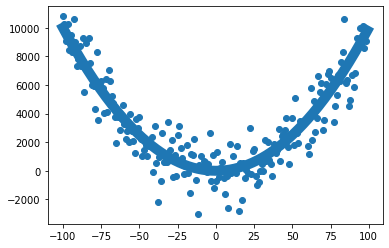

In [92]:
plt.scatter(x, x**2 + np.random.normal(1, 1200, size = len(x)))
plt.plot(x, x ** 2, linewidth = 10)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  3.,  3.,  1.,  2.,  3.,  3.,  5.,  3.,  6.,  3.,  4.,
         5.,  8., 10.,  7., 14., 14.,  8., 14., 16., 19., 20., 22., 27.,
        21., 19., 27., 15., 30., 35., 20., 33., 41., 36., 23., 34., 23.,
        25., 31., 14., 19., 26., 13., 19., 22., 18., 22., 22., 22., 13.,
        20., 12., 16., 12., 10.,  9., 12.,  4.,  7.,  5.,  3.,  8.,  3.,
         4.,  5.,  3.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.45382501, -3.38402412, -3.31422322, -3.24442233, -3.17462143,
        -3.10482054, -3.03501964, -2.96521875, -2.89541785, -2.82561696,
        -2.75581606, -2.68601517, -2.61621427, -2.54641338, -2.47661248,
        -2.40681159, -2.33701069, -2.26720979, -2.1974089 , -2.127608  ,
        -2.05780711, -1.98800621, -1.91820532, -1.84840442, -1.77860353,
        -1.70880263, -1.63900174, -1.56920084, -1.49939995, -1.429599

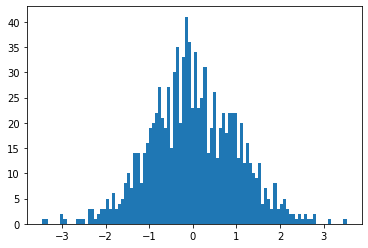

In [96]:
plt.hist(np.random.normal(0, 1, 1000), bins = 100)

<BarContainer object of 3 artists>

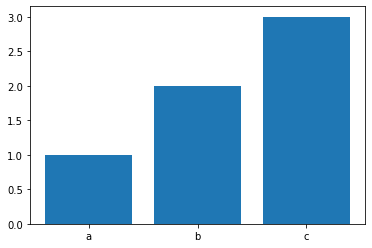

In [97]:
plt.bar(['a', 'b', 'c'], [1, 2, 3])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda282325b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda28232c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda28232580>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda28240640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda282324f0>],
 'means': []}

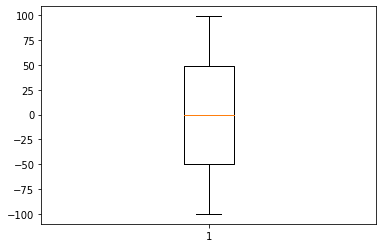

In [98]:
plt.boxplot(x)

([<matplotlib.patches.Wedge at 0x7fda613d97c0>,
 [Text(0.7778174593052024, 0.7778174593052023, ''),
  Text(-0.7778174593052023, 0.7778174593052024, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

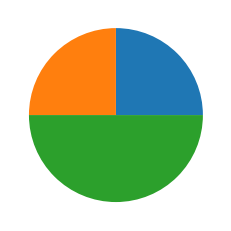

In [100]:
plt.pie(['1', '1', '2'])

(array([63., 26., 20., 18., 14., 14., 12., 12., 10., 11.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

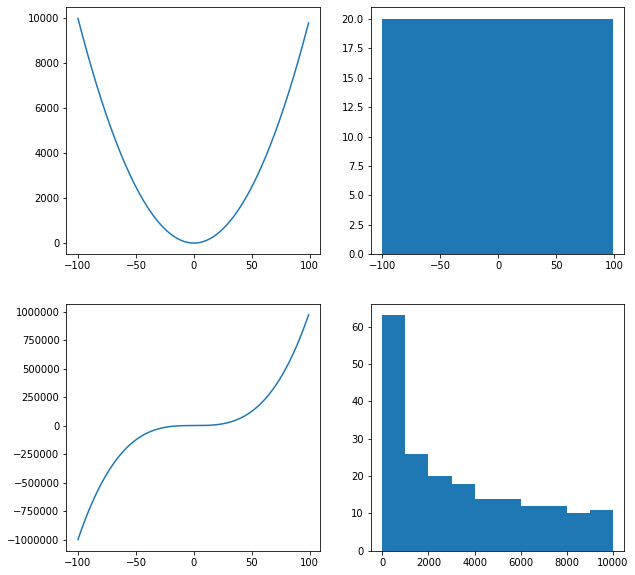

In [102]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0, 0].plot(x, x ** 2)
ax[0, 1].hist(x)
ax[1, 0].plot(x, x ** 3)
ax[1, 1].hist(x ** 2)

In [109]:
a = np.array([1, 2, 3])
a.shape

(3,)

In [113]:
a = a.reshape(3, 1)
a

array([[1],
       [2],
       [3]])